# HSMA 3C: Exercise 2 - Plotting a precalculated matrix of travel times

*The first cell only needs to be run if running in colab!* 

In [ ]:
!git clone https://github.com/hsma-programme/h6_3c_interactive_plots_travel.git
%cd /content/h6_3c_interactive_plots_travel/h6_3c_interactive_plots_travel/exercises_colab
!pip install contextily

In [158]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import folium
import contextily as cx

## Core

Import the travel matrix file named tia_travel_matrix.csv and check that the file has been read correctly. 

Define the index as sector

In [3]:
filepath = '../datasets/exercises_2_and_3/tia_travel_matrix.csv'

travel_matrix = pd.read_csv(filepath, index_col='sector')
travel_matrix.head()

,SACH,BODMIN,RCHT,CRCH,WCH
sector,,,,,
E01018750,40,31,60,66,87
E01018751,40,31,60,66,87
E01018752,41,32,61,67,88
E01018753,43,34,64,69,90
E01018754,46,38,67,72,93


Work out the shortest travel time from each LSOA and save this as a new column.

In [4]:
travel_matrix['shortest'] = travel_matrix.min(axis=1)

Import the LSOA boundary data (LSOA_2011_Boundaries_Super_Generalised_Clipped_BSC_EW_V4.geojson) from the folder exercises_2_and_3.

In [9]:
lsoa_boundaries = geopandas.read_file('../datasets/exercises_2_and_3/LSOA_2011_Boundaries_Super_Generalised_Clipped_BSC_EW_V4.geojson')
lsoa_boundaries.head()

,FID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,1,E01000001,City of London 001A,City of London 001A,532123,181632,-0.097140,51.51816,a758442e-7679-45d0-95a8-ed4c968ecdaa,"POLYGON ((532282.629 181906.496, 532248.250 18..."
1,2,E01000002,City of London 001B,City of London 001B,532480,181715,-0.091970,51.51882,861dbb53-dfaf-4f57-be96-4527e2ec511f,"POLYGON ((532746.814 181786.892, 532248.250 18..."
2,3,E01000003,City of London 001C,City of London 001C,532239,182033,-0.095320,51.52174,9f765b55-2061-484a-862b-fa0325991616,"POLYGON ((532293.068 182068.422, 532419.592 18..."
3,4,E01000005,City of London 001E,City of London 001E,533581,181283,-0.076270,51.51468,a55c4c31-ef1c-42fc-bfa9-07c8f2025928,"POLYGON ((533604.245 181418.129, 533743.689 18..."
4,5,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,544994,184274,0.089317,51.53875,9cdabaa8-d9bd-4a94-bb3b-98a933ceedad,"POLYGON ((545271.918 184183.948, 545296.314 18..."


Join the LSOA boundary data to the travel matrix. 

HINT: Think about the kind of join you want to do. We want the result to be a geodataframe, but we also don't want to keep all of the LSOAs from the geodataframe as many of them will be blank. Remember that common join options include 'left', 'right' and 'full'. 

In [12]:
lsoa_travel_gdf = pd.merge(
    lsoa_boundaries,
    travel_matrix.reset_index(),
    how='right',
    left_on='LSOA11CD',
    right_on='sector'
)

type(lsoa_travel_gdf)

geopandas.geodataframe.GeoDataFrame

In [13]:
lsoa_travel_gdf.head()

,FID,LSOA11CD,LSOA11NM,LSOA11NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,sector,SACH,BODMIN,RCHT,CRCH,WCH,shortest
0,18214,E01018750,Cornwall 013A,Cornwall 013A,236095,69145,-4.31248,50.49910,2c4831c1-b027-4135-9a28-450e150d02cc,"POLYGON ((236180.473 69643.476, 236970.145 696...",E01018750,40,31,60,66,87,31
1,18215,E01018751,Cornwall 013B,Cornwall 013B,236173,68217,-4.31098,50.49078,c30c9bdf-6431-4ba3-9194-c95d58acbf63,"POLYGON ((237889.500 70731.601, 238547.799 695...",E01018751,40,31,60,66,87,31
2,18216,E01018752,Cornwall 013C,Cornwall 013C,236022,70887,-4.31428,50.51473,00347196-f277-4ca7-b79b-5a9c7be7ae0b,"POLYGON ((236772.086 70896.576, 236663.225 704...",E01018752,41,32,61,67,88,32
3,18217,E01018753,Cornwall 010A,Cornwall 010A,240105,71485,-4.25699,50.52123,1402d09f-ade7-4daf-8b47-3d969561b002,"POLYGON ((242267.178 72374.542, 241885.001 722...",E01018753,43,34,64,69,90,34
4,18218,E01018754,Cornwall 010B,Cornwall 010B,242524,71608,-4.22294,50.52300,115c51b7-e7b7-47c4-9272-4a66db827be3,"POLYGON ((243316.243 72208.330, 242820.001 716...",E01018754,46,38,67,72,93,38


Create a static map (i.e. use the .plot method on your geodataframe) showing the travel time from each LSOA to the TIA clinic it takes the least time to travel to.

Add
- a basemap
- a legend
- a title 

Text(0.5, 1.0, 'TIA Clinic Travel Times')

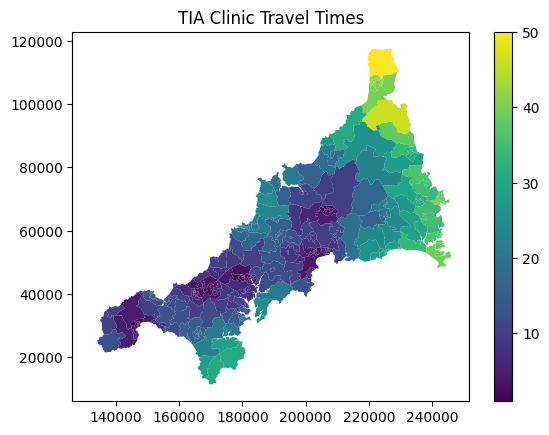

In [18]:
ax = lsoa_travel_gdf.plot(
    column='shortest',
    legend=True
)

plt.title("TIA Clinic Travel Times")

## Extension

Add in the clinic locations from **tia_clinic_locations.csv**. You will need to import this and convert it into a geodataframe.

Note that the clinic locations are given as latitude and longitude. Look at the crs of your travel geodataframe - will you need to convert the crs of the clinic locations?
(hint - you need epsg 27700, but what is the command to get to this?) 

In [122]:
clinic_locations_df = pd.read_csv("../datasets/exercises_2_and_3/tia_clinic_locations.csv")

clinic_locations_gdf = geopandas.GeoDataFrame(
    clinic_locations_df,
    geometry = geopandas.points_from_xy(
        clinic_locations_df['long'],
        clinic_locations_df['lat']
    ),
    crs='EPSG:4326'
)

clinic_locations_gdf = clinic_locations_gdf.to_crs("EPSG:27700")

clinic_locations_gdf

,clinic,full_name,lat,long,geometry
0,SACH,St Austell Community Hospital,50.345734,-4.755793,POINT (204024.776 53167.325)
1,BODMIN,Bodmin Community Hospital,50.483125,-4.744806,POINT (205370.726 68412.422)
2,RCHT,Royall Cornwall Hospital,50.292246,-5.094996,POINT (179647.550 48170.751)
3,CRCH,Camborne Redruth Community Hospital,50.240453,-5.244684,POINT (168736.634 42867.707)
4,WCH,West Cornwall Hospital,50.133179,-5.489130,POINT (150751.912 31731.856)


Plot the clinic locations on the same map.

Text(0.5, 1.0, 'TIA Clinic Travel Times')

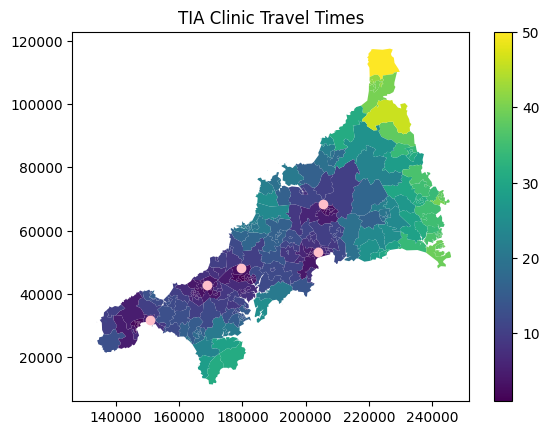

In [120]:
ax = lsoa_travel_gdf.plot(
    column='shortest',
    legend=True
)

clinic_locations_gdf.plot(
    ax=ax,
    color='pink'
)

plt.title("TIA Clinic Travel Times")

In [ ]:
clinic_locations_gdf

Add labels with the full clinic names to the map. 

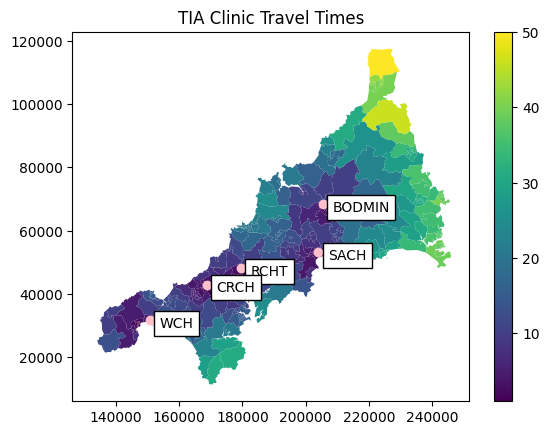

In [130]:
ax = lsoa_travel_gdf.plot(
    column='shortest',
    legend=True
)

clinic_locations_gdf.plot(
    ax=ax,
    color='pink'
)

plt.title("TIA Clinic Travel Times")

for x, y, label in zip(clinic_locations_gdf.geometry.x, clinic_locations_gdf.geometry.y, clinic_locations_gdf.clinic):
    ax.annotate(label, xy=(x, y), xytext=(7, -5), textcoords="offset points", bbox=dict(facecolor='white', edgecolor='black'))

Try making an interactive map of the same dataset. 

In [156]:
tia_map_interactive = folium.Map(
    location=[50,-4.5],
    zoom_start=9.25,
    tiles='cartodbpositron'
    )

choropleth = folium.Choropleth(
    geo_data = lsoa_travel_gdf,
    data = lsoa_travel_gdf,
    columns = ['LSOA11CD','shortest'],
    key_on = 'feature.properties.LSOA11CD',
    fill_color = 'OrRd',
    fill_opacity = 0.4,
    line_weight = 0.3,
    legend_name = "Travel time by car to nearest clinic (minutes)",
    highlight = True,
    smooth_factor = 0
)

choropleth.add_to(tia_map_interactive)

clinic_locations_geometry_list = [
    [point.xy[1][0], point.xy[0][0]] for point in clinic_locations_gdf.to_crs('EPSG:4326').geometry
    ]

for coordinates in clinic_locations_geometry_list:
    tia_map_interactive.add_child(
        folium.Marker(
            location=coordinates
        )
    )

for i, coordinates in enumerate(clinic_locations_geometry_list):
    tia_map_interactive.add_child(
        folium.Marker(
            location=coordinates,
            tooltip=f"{clinic_locations_gdf['clinic'][i]}: {clinic_locations_gdf['full_name'][i]}"
        )
    )

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        ['LSOA11CD','shortest'],
        labels=True
    )
)

tia_map_interactive

## Challenge: Bonus Exercises

You can do these in any order - or maybe you want to split them up within the group and share your code with each other afterwards!

### 1. Enhance your static map

Consider enhancing your static map further by
- adding a title
- adding a legend
- removing the axis numbers and ticks
- changing the colour map used for the choropleth 
- adding a basemap
- making your choropleth slightly see-through (changing the **opacity** value)
- making the edges of your LSOAs more or less obvious
- adjusting the figure size
- adjusting the extent of your map (e.g. maybe you want to show a bit extra around the edges of the region of interest)
- adding an inset map of a particularly dense area

(160000.0, 175000.0, 35000.0, 55000.0)

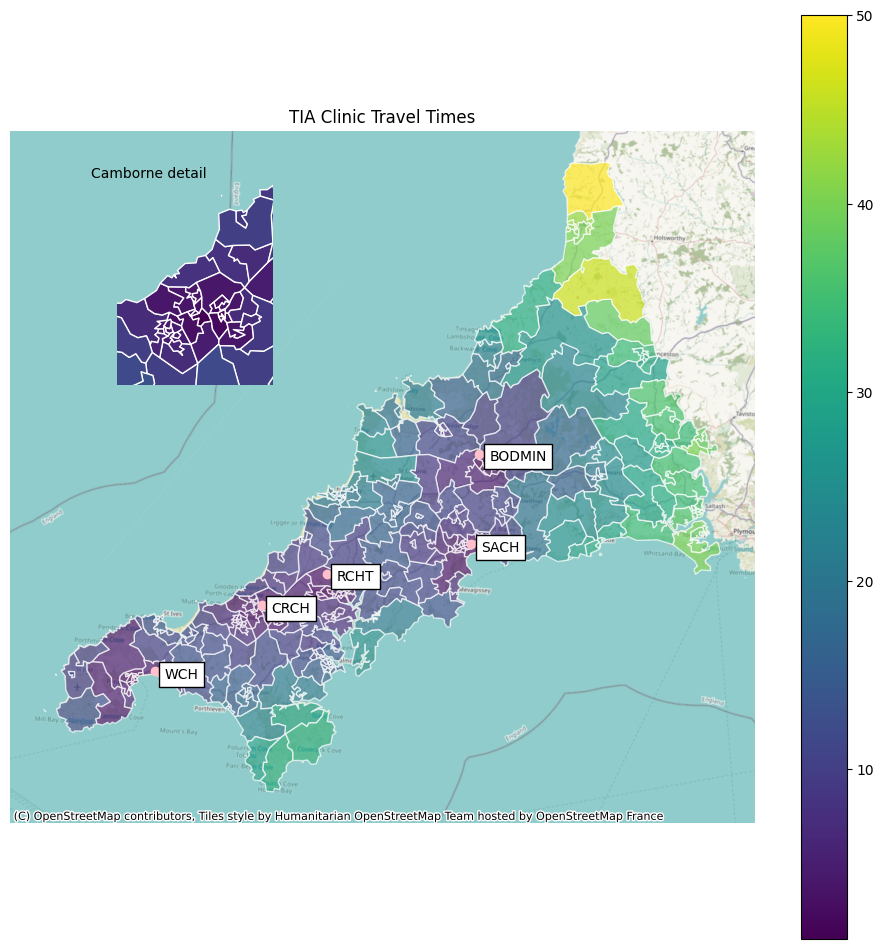

In [180]:
fig, ax = plt.subplots(figsize=(12,12))

lsoa_travel_gdf.plot(
    column='shortest',
    legend=True,
    figsize=(15,10),
    alpha=0.7,
    edgecolor="white",
    ax=ax
)

clinic_locations_gdf.plot(
    ax=ax,
    color='pink'
)

cx.add_basemap(
    ax,
    crs=clinic_locations_gdf.crs.to_string(),
    zoom=10
)

plt.title("TIA Clinic Travel Times")

for x, y, label in zip(clinic_locations_gdf.geometry.x, clinic_locations_gdf.geometry.y, clinic_locations_gdf.clinic):
    ax.annotate(label, xy=(x, y), xytext=(7, -5), textcoords="offset points", bbox=dict(facecolor='white', edgecolor='black'))

ax2 = ax.inset_axes(
    [135000, 80000, 45000, 35000],
    transform=ax.transData,
    xlim=(160000,175000),
    ylim=(35000,55000)
    )

ax.text(140000,115000, "Camborne detail", fontsize="medium")

lsoa_travel_gdf.plot(
    column='shortest',
    alpha=1,
    edgecolor="white",
    ax=ax2
)

ax.axis('off')
ax2.axis('off')

### 2. Create a map with LSOAs coloured by their nearest clinic

Instead of showing the travel time to the nearest clinic, consider how you could work out *which* clinic is the closest clinic in each instance. 

Create a map where each LSOA has a colour assigned based on which hospital it is quickest to travel to.

HINT: look up the idxmin function.

Text(0.5, 1.0, 'Closest TIA Clinic by LSOA')

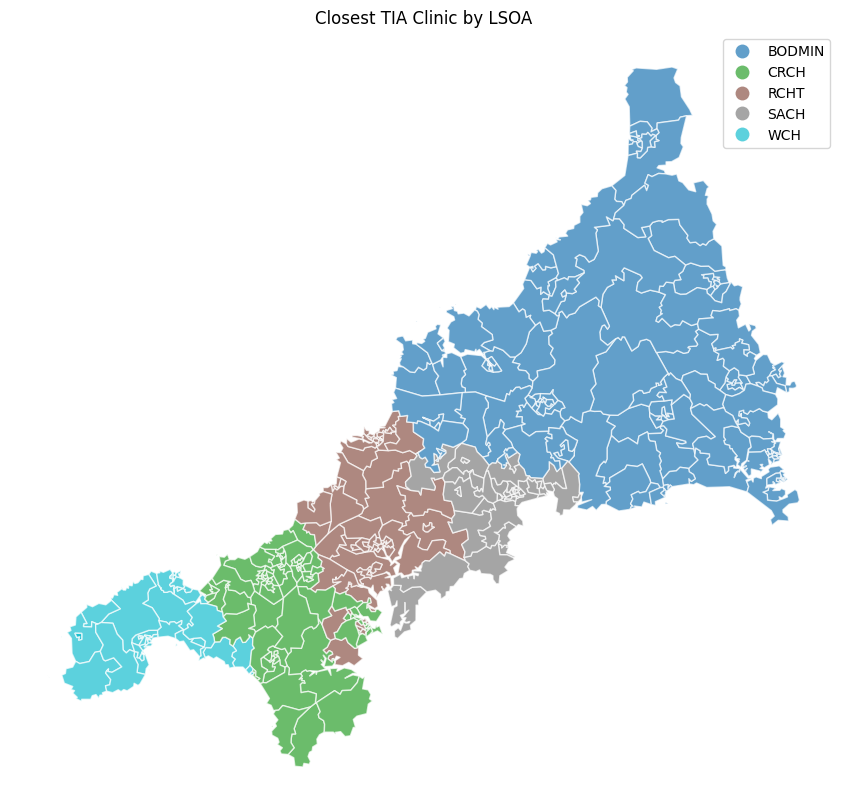

In [196]:
closest_hospital = travel_matrix.idxmin(axis=1).reset_index().rename(columns={0:"Closest Hospital"})
lsoa_travel_gdf = pd.merge(lsoa_travel_gdf, closest_hospital.reset_index(), how="left")

ax = lsoa_travel_gdf.plot(
    column='Closest Hospital',
    legend=True,
    figsize=(15,10),
    alpha=0.7,
    edgecolor="white"
)

ax.axis('off')
plt.title("Closest TIA Clinic by LSOA")

### 3. Display the demand side-by-side with the travel times

Load in the file **tia_attendances.csv**, which shows the demand for the TIA clinics that came from each LSOA (in terms of number of people using a clinic), and join it to the LSOA boundary geojson so you can plot it. 

Look back at the lecture materials from this morning about subplots. Use `plt.subplots()` to make two plots side-by-side. In one subplot, put the travel time map you made above. In the other, plot the attendances data. 

Make sure to give each subplot a title. 

If you want to take this even further, make three subplots and add your map from bonus exercise 1 into your output. 

### 4. Enhance the tooltip of your interactive map

Try adding a tooltip that gives 
- the travel time to all five clinics
- the name of the nearest clinic

In [ ]:
tia_map_interactive = folium.Map(
    location=[50,-4.5],
    zoom_start=9.25,
    tiles='cartodbpositron'
    )

choropleth = folium.Choropleth(
    geo_data = lsoa_travel_gdf,
    data = lsoa_travel_gdf,
    columns = ['LSOA11CD','shortest'],
    key_on = 'feature.properties.LSOA11CD',
    fill_color = 'OrRd',
    fill_opacity = 0.4,
    line_weight = 0.3,
    legend_name = "Travel time by car to nearest clinic (minutes)",
    highlight = True,
    smooth_factor = 0
)

choropleth.add_to(tia_map_interactive)

clinic_locations_geometry_list = [
    [point.xy[1][0], point.xy[0][0]] for point in clinic_locations_gdf.to_crs('EPSG:4326').geometry
    ]

for coordinates in clinic_locations_geometry_list:
    tia_map_interactive.add_child(
        folium.Marker(
            location=coordinates
        )
    )

for i, coordinates in enumerate(clinic_locations_geometry_list):
    tia_map_interactive.add_child(
        folium.Marker(
            location=coordinates,
            tooltip=f"{clinic_locations_gdf['clinic'][i]}: {clinic_locations_gdf['full_name'][i]}"
        )
    )

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        ['LSOA11CD','Closest Hospital', 'shortest', 'CRCH', 'WCH', 'BODMIN', 'RCHT', 'SACH'],
        labels=True
    )
)

tia_map_interactive

### 5. Add an extra layer to your interactive map

Try adding the layer showing the nearest hospital to your interactive Folium map, then make it possible to toggle between the two.

In [232]:
tia_map_interactive = folium.Map(
    location=[50,-4.5],
    zoom_start=9.25,
    tiles='cartodbpositron'
    )

choropleth = folium.Choropleth(
    geo_data = lsoa_travel_gdf,
    data = lsoa_travel_gdf,
    columns = ['LSOA11CD','shortest'],
    key_on = 'feature.properties.LSOA11CD',
    fill_color = 'OrRd',
    fill_opacity = 0.4,
    line_weight = 0.3,
    legend_name = "Travel time by car to nearest clinic (minutes)",
    highlight = True,
    smooth_factor = 0,
    name='Travel Time'
)

choropleth.add_to(tia_map_interactive)

colormap = {'SACH': 'red', 'RCHT': 'green', 'BODMIN': 'blue', 'WCH':'purple', 'CRCH': 'yellow'}

def styler(feature):
    category = feature['properties']['Closest Hospital']

    return {
        'fillColor': colormap[category],
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }

color_nearest = folium.GeoJson(
    data=lsoa_travel_gdf,
    name='Closest Hospital',
    style_function=styler
)

color_nearest.add_to(tia_map_interactive)


# tia_map_interactive.fit_bounds(color_nearest.get_bounds())

clinic_locations_geometry_list = [
    [point.xy[1][0], point.xy[0][0]] for point in clinic_locations_gdf.to_crs('EPSG:4326').geometry
    ]

for coordinates in clinic_locations_geometry_list:
    tia_map_interactive.add_child(
        folium.Marker(
            location=coordinates
        )
    )

for i, coordinates in enumerate(clinic_locations_geometry_list):
    tia_map_interactive.add_child(
        folium.Marker(
            location=coordinates,
            tooltip=f"{clinic_locations_gdf['clinic'][i]}: {clinic_locations_gdf['full_name'][i]}"
        )
    )

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        ['LSOA11CD','Closest Hospital', 'shortest', 'CRCH', 'WCH', 'BODMIN', 'RCHT', 'SACH'],
        labels=True
    )
)

folium.LayerControl(collapsed=False).add_to(tia_map_interactive)

tia_map_interactive